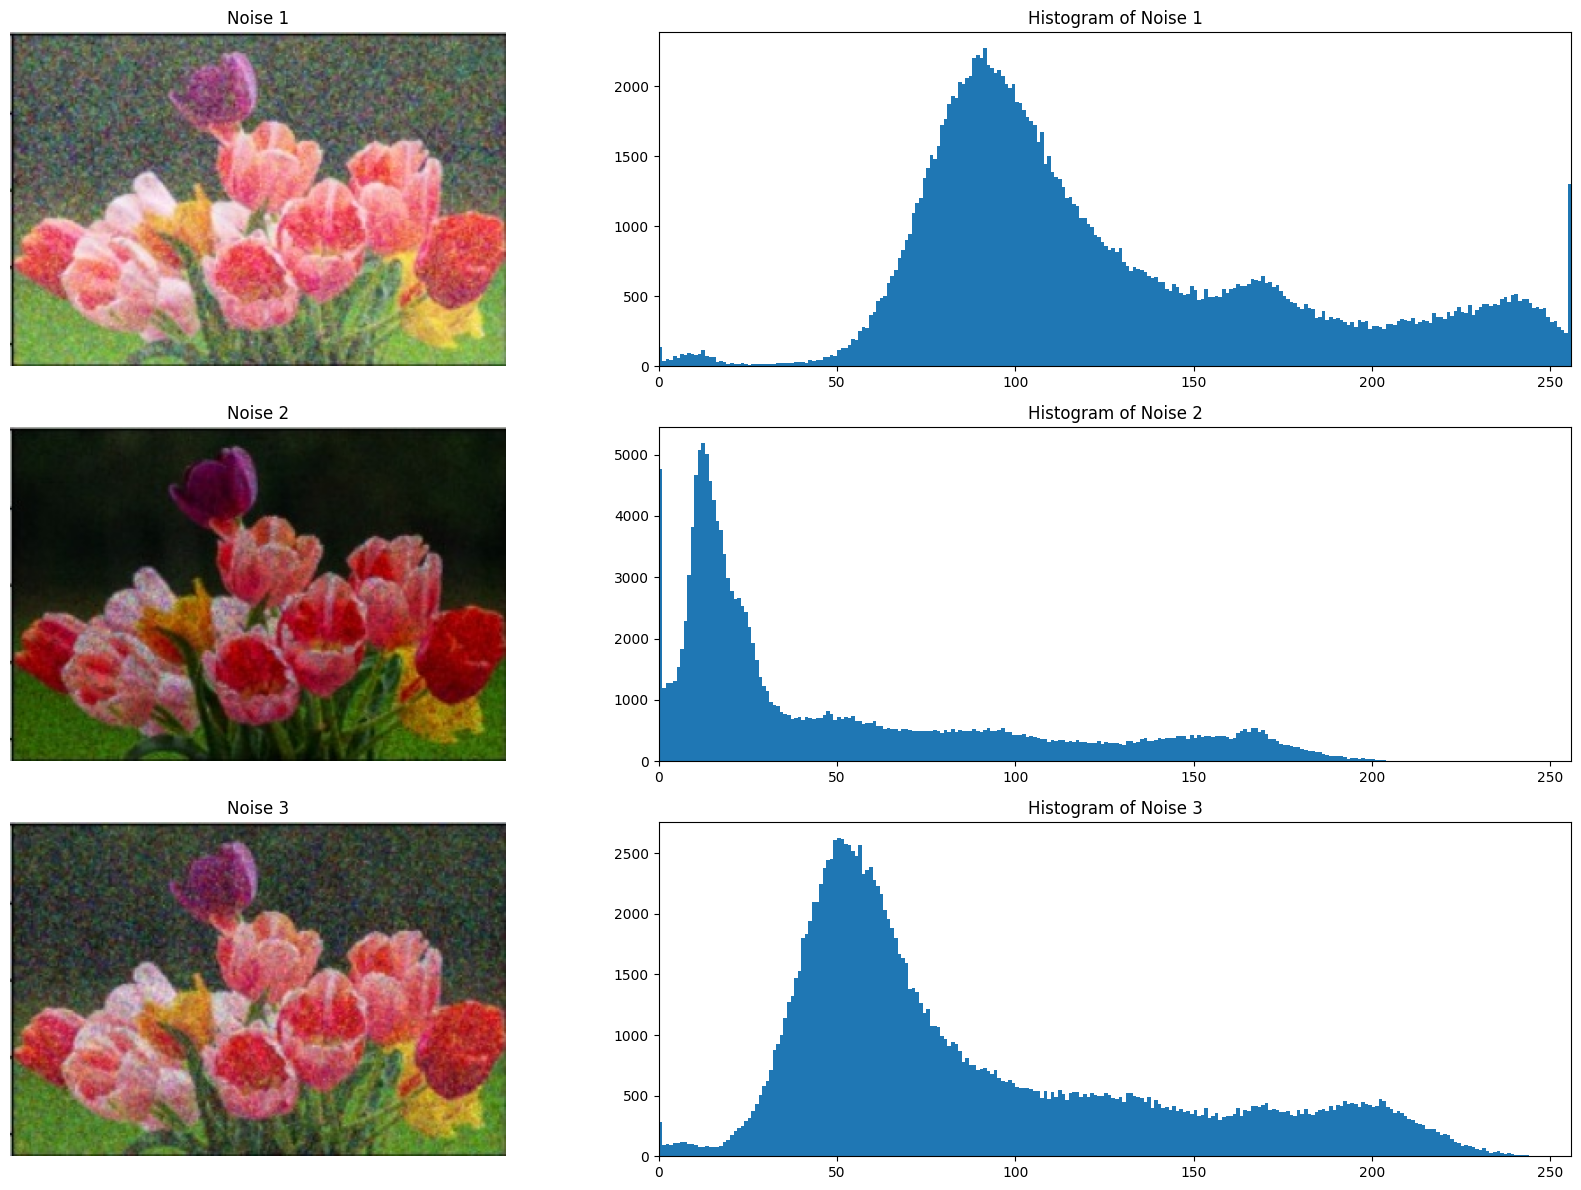

In [72]:
#ANALISIS NOISE
import cv2
import matplotlib.pyplot as plt

# Load the images
noise1 = cv2.imread('noise1.jpg')
noise2 = cv2.imread('noise2.jpg')
noise3 = cv2.imread('noise3.jpg')

# Convert the images to grayscale for histogram analysis
gray_noise1 = cv2.cvtColor(noise1, cv2.COLOR_BGR2GRAY)
gray_noise2 = cv2.cvtColor(noise2, cv2.COLOR_BGR2GRAY)
gray_noise3 = cv2.cvtColor(noise3, cv2.COLOR_BGR2GRAY)

# Function to plot the images and their histograms
def plot_images_and_histograms(images, titles):
    plt.figure(figsize=(18, 12))
    for i, (image, title) in enumerate(zip(images, titles), 1):
        plt.subplot(3, 2, 2*i-1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
        
        plt.subplot(3, 2, 2*i)
        plt.hist(image.ravel(), 256, [0, 256])
        plt.title(f'Histogram of {title}')
        plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()

# Plot the images and their histograms
plot_images_and_histograms([noise1, noise2, noise3], ['Noise 1', 'Noise 2', 'Noise 3'])


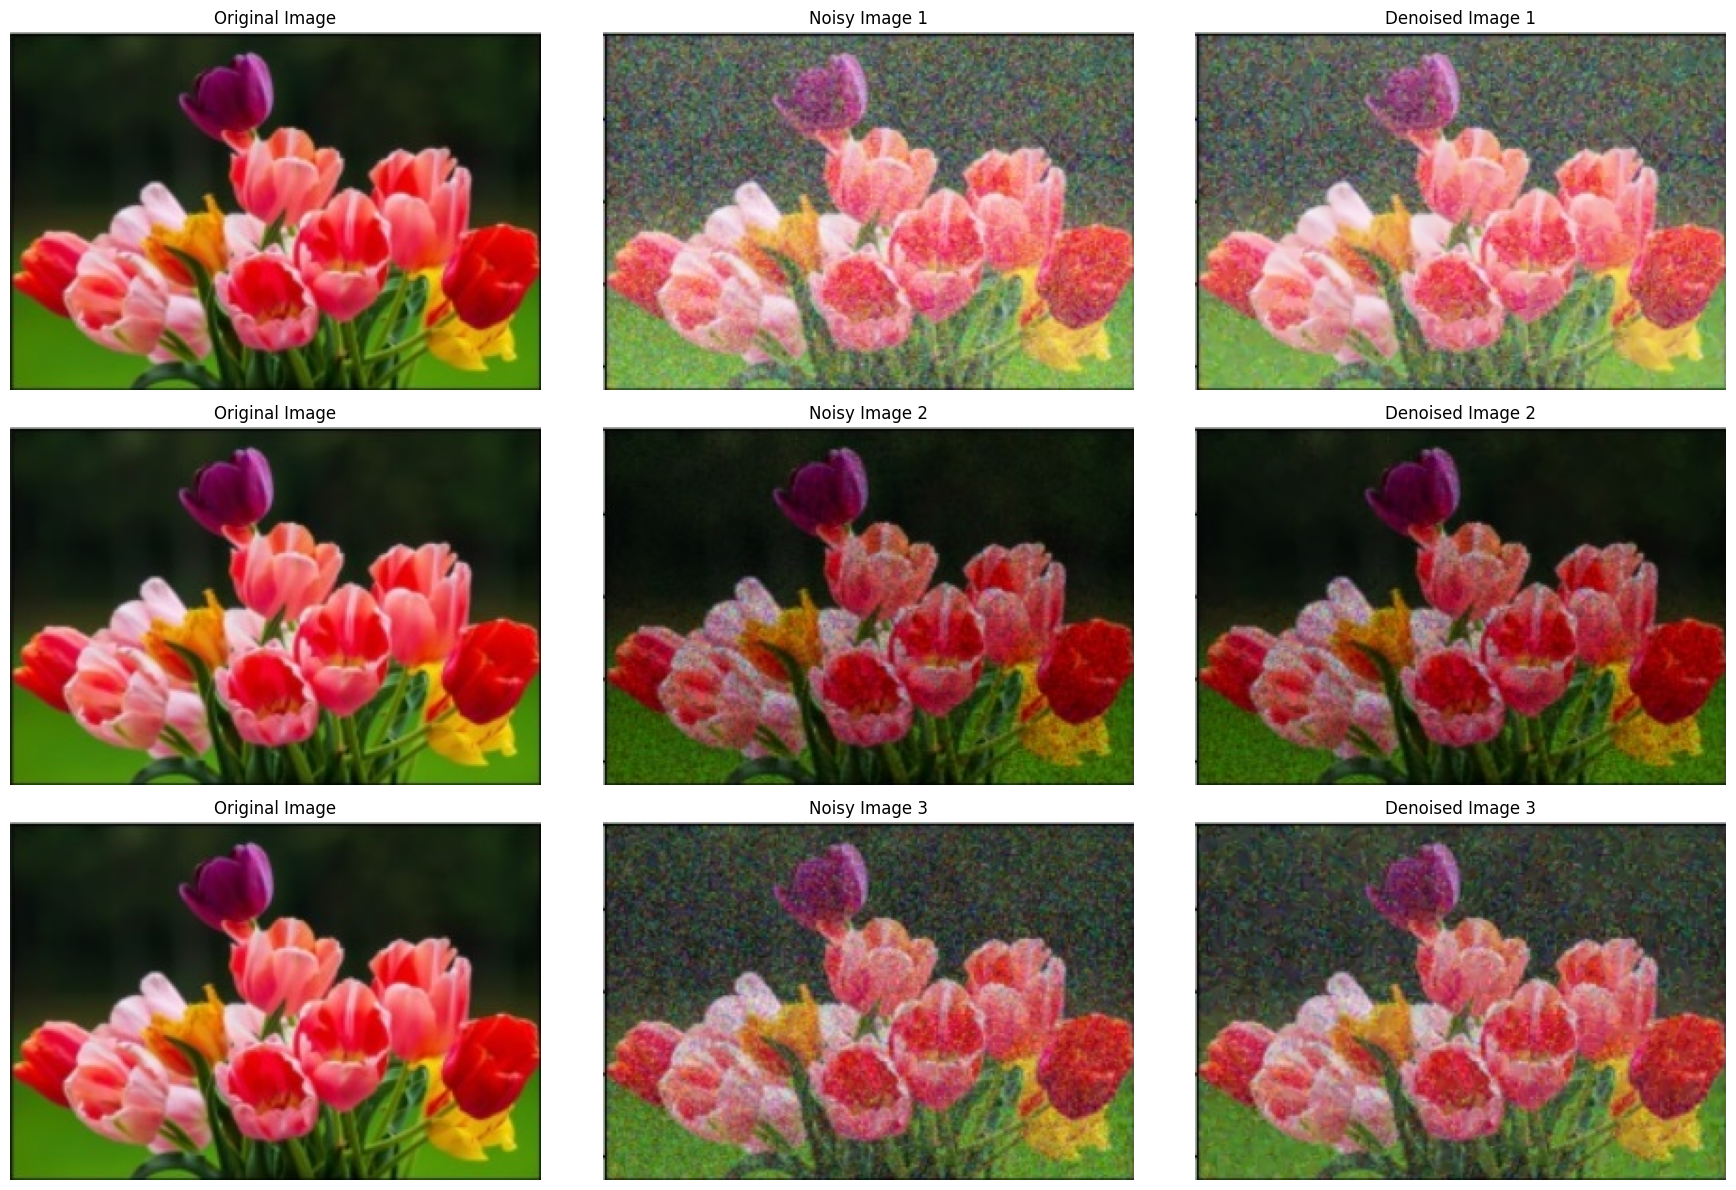

PSNR Original vs Noisy1: 60.72
PSNR Original vs Denoised1: 60.73
PSNR Original vs Noisy2: 65.82
PSNR Original vs Denoised2: 65.82
PSNR Original vs Noisy3: 66.41
PSNR Original vs Denoised3: 66.50


In [52]:
#NON LOCAL MEANS
import math
import cv2
import csv
import os
from skimage import io, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma
import numpy as np

# Function to read BMP images
def read_bmp(image_name):
    return cv2.imread(image_name + '.bmp')

# Function to calculate PSNR
def calculate_psnr(img1, img2):
    height, width, channel = img1.shape
    size = height * width

    mseb = ((img1[:, :, 0] - img2[:, :, 0]) ** 2).sum()
    mseg = ((img1[:, :, 1] - img2[:, :, 1]) ** 2).sum()
    mser = ((img1[:, :, 2] - img2[:, :, 2]) ** 2).sum()

    MSE = (mseb + mseg + mser) / (3 * size)
    psnr = 10 * math.log10(255 ** 2 / MSE)
    return round(psnr, 2)

# Load the original and the noisy images
original_img = img_as_float(io.imread('original.jpg'))
noisy_img1 = img_as_float(io.imread('noise1.jpg'))
noisy_img2 = img_as_float(io.imread('noise2.jpg'))
noisy_img3 = img_as_float(io.imread('noise3.jpg'))

# Estimate the noise standard deviation from the noisy images
sigma_est1 = np.mean(estimate_sigma(noisy_img1, channel_axis=-1))
sigma_est2 = np.mean(estimate_sigma(noisy_img2, channel_axis=-1))
sigma_est3 = np.mean(estimate_sigma(noisy_img3, channel_axis=-1))

# Apply Non-Local Means Denoising
denoised_img1 = denoise_nl_means(noisy_img1, h=1.15 * sigma_est1, fast_mode=True,
                                 patch_size=5, patch_distance=3, channel_axis=-1)
denoised_img2 = denoise_nl_means(noisy_img2, h=1.15 * sigma_est2, fast_mode=True,
                                 patch_size=5, patch_distance=3, channel_axis=-1)
denoised_img3 = denoise_nl_means(noisy_img3, h=1.15 * sigma_est3, fast_mode=True,
                                 patch_size=5, patch_distance=3, channel_axis=-1)

# Calculate PSNR between original and noisy images
psnr_original_noisy1 = calculate_psnr(original_img, noisy_img1)
psnr_original_noisy2 = calculate_psnr(original_img, noisy_img2)
psnr_original_noisy3 = calculate_psnr(original_img, noisy_img3)

# Calculate PSNR between original and denoised images
psnr_original_denoised1 = calculate_psnr(original_img, denoised_img1)
psnr_original_denoised2 = calculate_psnr(original_img, denoised_img2)
psnr_original_denoised3 = calculate_psnr(original_img, denoised_img3)

# PSNR values
psnr_values = {
    "PSNR Original vs Noisy1": psnr_original_noisy1,
    "PSNR Original vs Denoised1": psnr_original_denoised1,
    "PSNR Original vs Noisy2": psnr_original_noisy2,
    "PSNR Original vs Denoised2": psnr_original_denoised2,
    "PSNR Original vs Noisy3": psnr_original_noisy3,
    "PSNR Original vs Denoised3": psnr_original_denoised3
}

# Displaying the original, noisy, and denoised images side by side
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

# Original images
axes[0][0].imshow(original_img)
axes[0][0].set_title('Original Image')
axes[0][0].axis('off')

axes[1][0].imshow(original_img)
axes[1][0].set_title('Original Image')
axes[1][0].axis('off')

axes[2][0].imshow(original_img)
axes[2][0].set_title('Original Image')
axes[2][0].axis('off')

# Noisy images
axes[0][1].imshow(noisy_img1)
axes[0][1].set_title('Noisy Image 1')
axes[0][1].axis('off')

axes[1][1].imshow(noisy_img2)
axes[1][1].set_title('Noisy Image 2')
axes[1][1].axis('off')

axes[2][1].imshow(noisy_img3)
axes[2][1].set_title('Noisy Image 3')
axes[2][1].axis('off')

# Denoised images
axes[0][2].imshow(denoised_img1)
axes[0][2].set_title('Denoised Image 1')
axes[0][2].axis('off')

axes[1][2].imshow(denoised_img2)
axes[1][2].set_title('Denoised Image 2')
axes[1][2].axis('off')

axes[2][2].imshow(denoised_img3)
axes[2][2].set_title('Denoised Image 3')
axes[2][2].axis('off')

plt.tight_layout()
plt.show()
# Print PSNR values
# Display PSNR values in a neat and readable format
formatted_psnr_values = "\n".join(f"{key}: {value:.2f}" for key, value in psnr_values.items())
print(formatted_psnr_values)

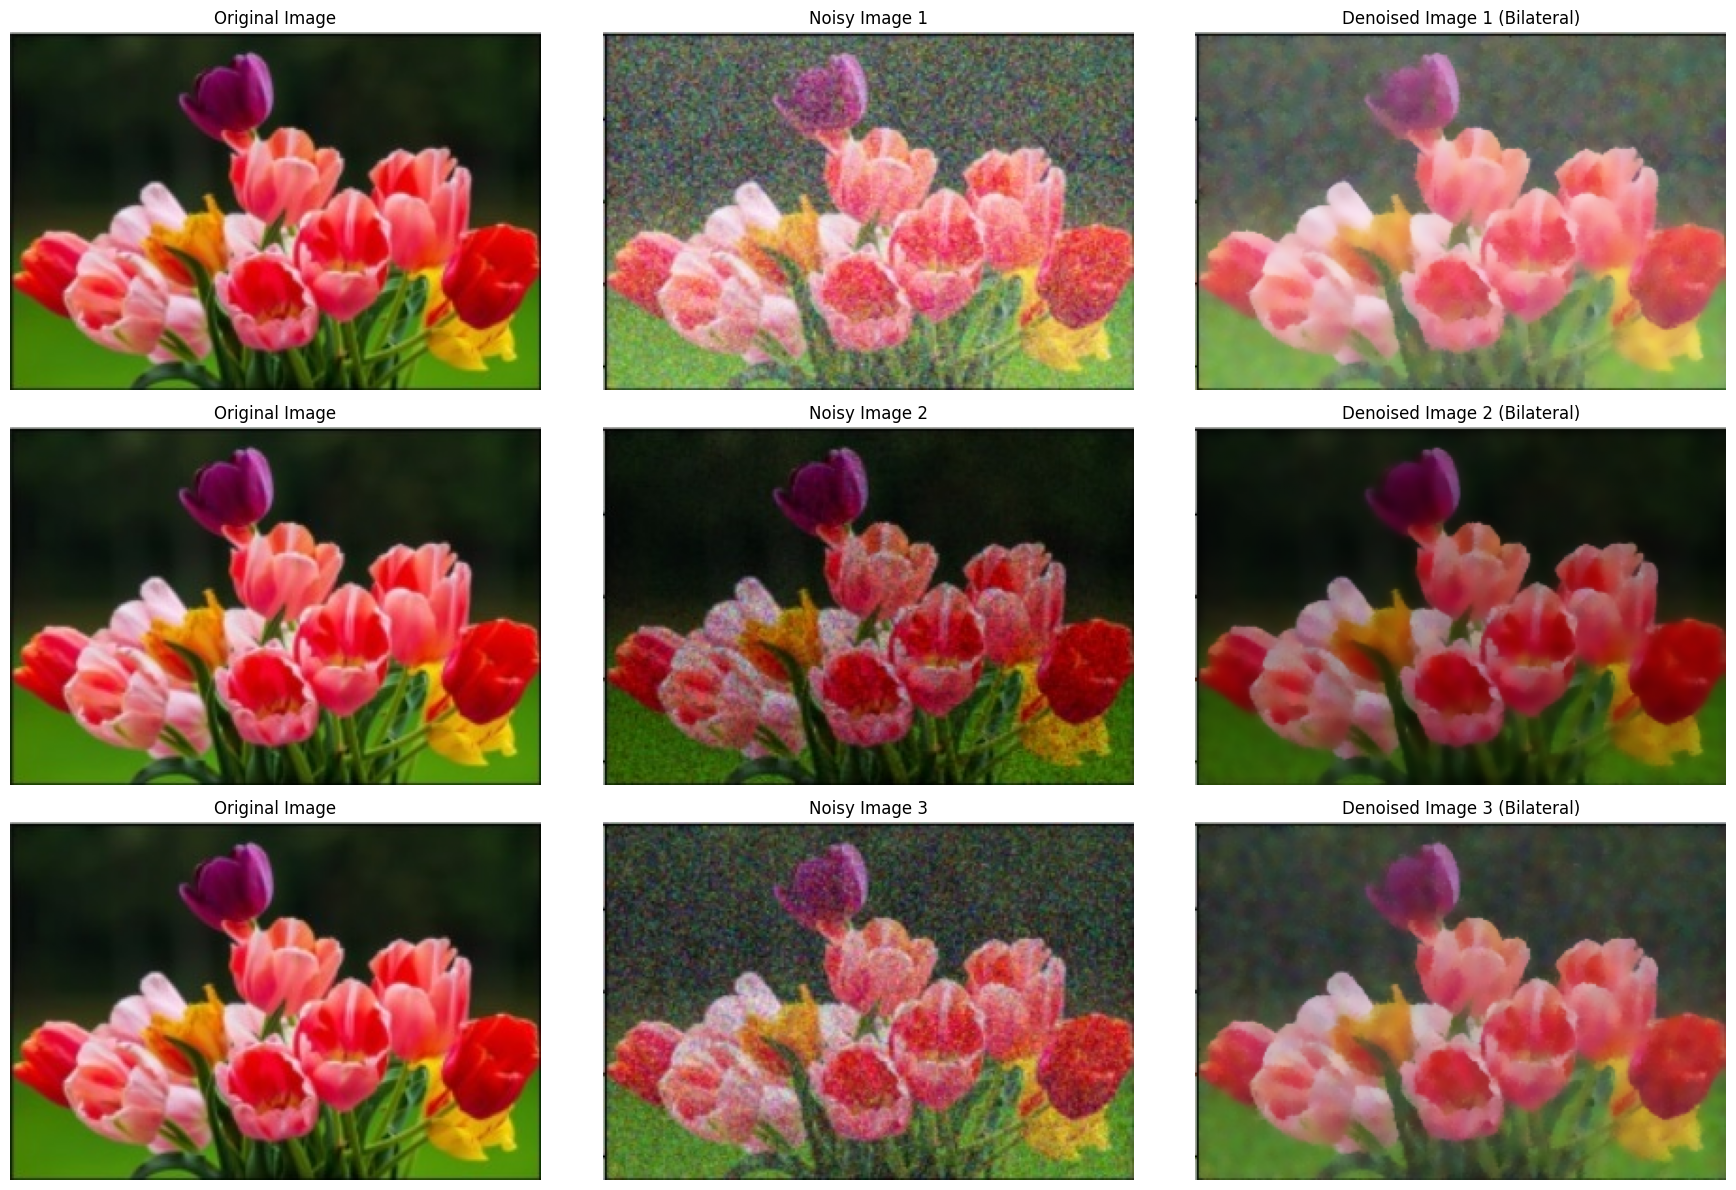

PSNR Original vs Noisy1: 60.72
PSNR Original vs Denoised1: 60.80
PSNR Original vs Noisy2: 65.82
PSNR Original vs Denoised2: 65.69
PSNR Original vs Noisy3: 66.41
PSNR Original vs Denoised3: 66.64


In [71]:
#BILATERAL FILTERING
import math
import cv2
from skimage import io, img_as_ubyte, img_as_float
import numpy as np

# Function to read BMP images
def read_bmp(image_name):
    return cv2.imread(image_name + '.bmp')

# Function to calculate PSNR
def calculate_psnr(img1, img2):
    height, width, channel = img1.shape
    size = height * width

    mseb = ((img1[:, :, 0] - img2[:, :, 0]) ** 2).sum()
    mseg = ((img1[:, :, 1] - img2[:, :, 1]) ** 2).sum()
    mser = ((img1[:, :, 2] - img2[:, :, 2]) ** 2).sum()

    MSE = (mseb + mseg + mser) / (3 * size)
    psnr = 10 * math.log10(255 ** 2 / MSE)
    return round(psnr, 2)

# Load the original and the noisy images
original_img = img_as_float(io.imread('original.jpg'))
noisy_img1 = img_as_float(io.imread('noise1.jpg'))
noisy_img2 = img_as_float(io.imread('noise2.jpg'))
noisy_img3 = img_as_float(io.imread('noise3.jpg'))

# Convert the noisy images to uint8
noisy_img1_uint8 = img_as_ubyte(noisy_img1)
noisy_img2_uint8 = img_as_ubyte(noisy_img2)
noisy_img3_uint8 = img_as_ubyte(noisy_img3)

# Apply Bilateral Filtering for denoising
denoised_img1_uint8 = cv2.bilateralFilter(noisy_img1_uint8, d=9, sigmaColor=75, sigmaSpace=75)
denoised_img2_uint8 = cv2.bilateralFilter(noisy_img2_uint8, d=9, sigmaColor=75, sigmaSpace=75)
denoised_img3_uint8 = cv2.bilateralFilter(noisy_img3_uint8, d=9, sigmaColor=75, sigmaSpace=75)

# Convert the denoised images back to float32
denoised_img1 = img_as_float(denoised_img1_uint8)
denoised_img2 = img_as_float(denoised_img2_uint8)
denoised_img3 = img_as_float(denoised_img3_uint8)

# Calculate PSNR between original and noisy images
psnr_original_noisy1 = calculate_psnr(original_img, noisy_img1)
psnr_original_noisy2 = calculate_psnr(original_img, noisy_img2)
psnr_original_noisy3 = calculate_psnr(original_img, noisy_img3)

# Calculate PSNR between original and denoised images
psnr_original_denoised1 = calculate_psnr(original_img, denoised_img1)
psnr_original_denoised2 = calculate_psnr(original_img, denoised_img2)
psnr_original_denoised3 = calculate_psnr(original_img, denoised_img3)

# PSNR values
psnr_values = {
    "PSNR Original vs Noisy1": psnr_original_noisy1,
    "PSNR Original vs Denoised1": psnr_original_denoised1,
    "PSNR Original vs Noisy2": psnr_original_noisy2,
    "PSNR Original vs Denoised2": psnr_original_denoised2,
    "PSNR Original vs Noisy3": psnr_original_noisy3,
    "PSNR Original vs Denoised3": psnr_original_denoised3
}

# Displaying the original, noisy, and denoised images side by side
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

# Original images
axes[0][0].imshow(original_img)
axes[0][0].set_title('Original Image')
axes[0][0].axis('off')

axes[1][0].imshow(original_img)
axes[1][0].set_title('Original Image')
axes[1][0].axis('off')

axes[2][0].imshow(original_img)
axes[2][0].set_title('Original Image')
axes[2][0].axis('off')

# Noisy images
axes[0][1].imshow(noisy_img1)
axes[0][1].set_title('Noisy Image 1')
axes[0][1].axis('off')

axes[1][1].imshow(noisy_img2)
axes[1][1].set_title('Noisy Image 2')
axes[1][1].axis('off')

axes[2][1].imshow(noisy_img3)
axes[2][1].set_title('Noisy Image 3')
axes[2][1].axis('off')

# Denoised images (Bilateral Filtering)
axes[0][2].imshow(denoised_img1)
axes[0][2].set_title('Denoised Image 1 (Bilateral)')
axes[0][2].axis('off')

axes[1][2].imshow(denoised_img2)
axes[1][2].set_title('Denoised Image 2 (Bilateral)')
axes[1][2].axis('off')

axes[2][2].imshow(denoised_img3)
axes[2][2].set_title('Denoised Image 3 (Bilateral)')
axes[2][2].axis('off')

plt.tight_layout()
plt.show()

# Print PSNR values
# Display PSNR values in a neat and readable format
formatted_psnr_values = "\n".join(f"{key}: {value:.2f}" for key, value in psnr_values.items())
print(formatted_psnr_values)


PSNR Original vs Noisy: 66.41
PSNR Original vs Denoised (NLM): 66.72
PSNR Original vs Denoised (NLM + Bilateral): 66.77


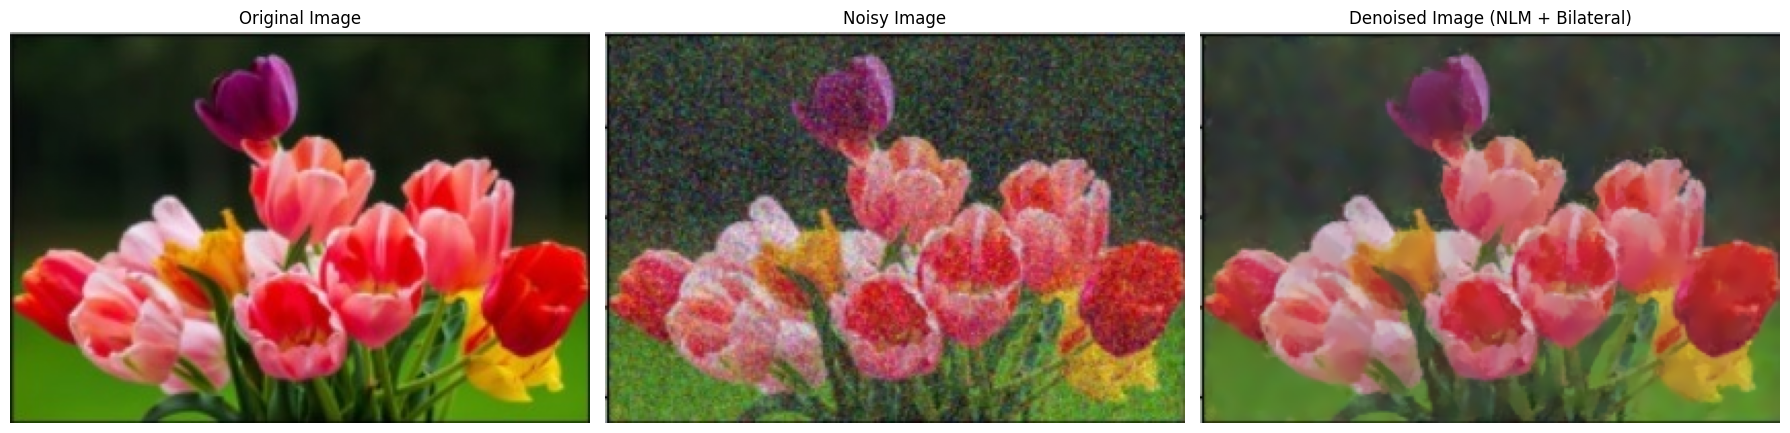

In [87]:
#NLM + BILATERAL FILTERING
import math
import cv2
import matplotlib.pyplot as plt
from skimage import io, img_as_float, img_as_ubyte
from skimage.restoration import denoise_nl_means, estimate_sigma
import numpy as np

# Function to calculate PSNR
def calculate_psnr(img1, img2):
    height, width, channel = img1.shape
    size = height * width

    mseb = ((img1[:, :, 0] - img2[:, :, 0]) ** 2).sum()
    mseg = ((img1[:, :, 1] - img2[:, :, 1]) ** 2).sum()
    mser = ((img1[:, :, 2] - img2[:, :, 2]) ** 2).sum()

    MSE = (mseb + mseg + mser) / (3 * size)
    psnr = 10 * math.log10(255 ** 2 / MSE)
    return round(psnr, 2)

# Load the original and the noisy images
original_img = img_as_float(io.imread('original.jpg'))
noisy_img = img_as_float(io.imread('noise3.jpg'))

# Estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(noisy_img, channel_axis=-1))

# Apply Non-Local Means Denoising
denoised_img_nlm = denoise_nl_means(noisy_img, h=2 * sigma_est, fast_mode=True,
                                 patch_size=10, patch_distance=5, channel_axis=-1)

# Convert the NLM denoised image to uint8 for Bilateral Filtering
denoised_img_nlm_uint8 = img_as_ubyte(denoised_img_nlm)

# Apply Bilateral Filtering
denoised_img_bilateral = cv2.bilateralFilter(denoised_img_nlm_uint8, d=9, sigmaColor=25, sigmaSpace=25)

# Convert the Bilaterally Filtered image back to float32
denoised_img_final = img_as_float(denoised_img_bilateral)

# Calculate PSNR values
psnr_original_noisy = calculate_psnr(original_img, noisy_img)
psnr_original_denoised_nlm = calculate_psnr(original_img, denoised_img_nlm)
psnr_original_denoised_final = calculate_psnr(original_img, denoised_img_final)

# Display PSNR values
print(f"PSNR Original vs Noisy: {psnr_original_noisy:.2f}")
print(f"PSNR Original vs Denoised (NLM): {psnr_original_denoised_nlm:.2f}")
print(f"PSNR Original vs Denoised (NLM + Bilateral): {psnr_original_denoised_final:.2f}")

# Displaying the original, noisy, and denoised images
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_img)
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(denoised_img_final)
plt.title('Denoised Image (NLM + Bilateral)')
plt.axis('off')

plt.tight_layout()
plt.show()
